In [1]:
import sys
configDir =  '/home/thibaud/repos/anaconda/rakuten/notebook'
if configDir not in sys.path:
    sys.path.append(configDir)

import config


import warnings
warnings.filterwarnings('ignore')
from importlib import reload
import src.utils.results as results
from sklearn.metrics import f1_score

# print(config.path_to_data)
reload(results)

from src.utils.results import ResultsManager
res = ResultsManager(config)
res.add_result_file('../results/results_benchmark_sklearn.csv', 'text')
res.add_result_file('../results/results_benchmark_sklearn_tfidf.csv', 'text')
res.add_result_file('../results/results_benchmark_bert.csv', 'bert')
res.add_result_file('../results/results_benchmark_img.csv', 'img')
res.add_result_file('../results/results_benchmark_fusion_TF.csv', 'fusion')

2024-03-14 17:54:52.044651: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 17:54:52.072010: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 17:54:53.446913: I itex/core/wrapper/itex_gpu_wrapper.cc:35] Intel Extension for Tensorflow* GPU backend is loaded.
2024-03-14 17:54:53.478724: I itex/core/wrapper/itex_cpu_wrapper.cc:52] Intel Extension for Tensorflow* AVX2 CPU backend is loaded.
2024-03-14 17:54:53.528969: W itex/core/ops/op_init.cc:58] Op: _QuantizedMaxPool3D is already registere

In [2]:
res.get_model_paths()

array(['text/LogisticRegression_cbow', 'text/RandomForestClassifier_cbow',
       'text/SVC_cbow', 'text/xgboost_cbow', 'text/SVC_skipgram',
       'text/LogisticRegression_skipgram',
       'text/RandomForestClassifier_skipgram', 'text/xgboost_skipgram',
       'text/LinearSVC_tfidf', 'text/LogisticRegression_tfidf',
       'text/MultinomialNB_tfidf', 'text/RandomForestClassifier_tfidf',
       'text/xgboost_tfidf', 'text/SVC_tfidf',
       'text/camembert-base-ccnet', 'text/camembert-base',
       'text/flaubert_base_uncased', 'image/vit_b16', 'image/ResNet152',
       'image/ResNet101', 'image/EfficientNetB1', 'image/ResNet50',
       'fusion/camembert-base-vit_b16_TF6',
       'fusion/camembert-base-vit_b16_TF3_att12',
       'fusion/camembert-base-vit_b16_TF6_att12',
       'fusion/camembert-base-vit_b16_TF1_att12'], dtype=object)

# Plot des performances texte générales


In [3]:
import src.utils.plot as uplot

reload(uplot)
res.plot_f1_scores(['text'], figsize=(800,400), title="f1_score des modèles ML sur le texte")

In [4]:
reload(uplot)
reload(results)
res.plot_f1_scores(filter_model=['text/LinearSVC_tfidf', 'text/camembert-base', 'text/camembert-base-ccnet', 'text/flaubert_base_uncased'], figsize=(800,300), title="f1 scores des modèles BERT par rapport au meilleur modèle ML")

# Matrice de confusion LinearSVC-tfidf

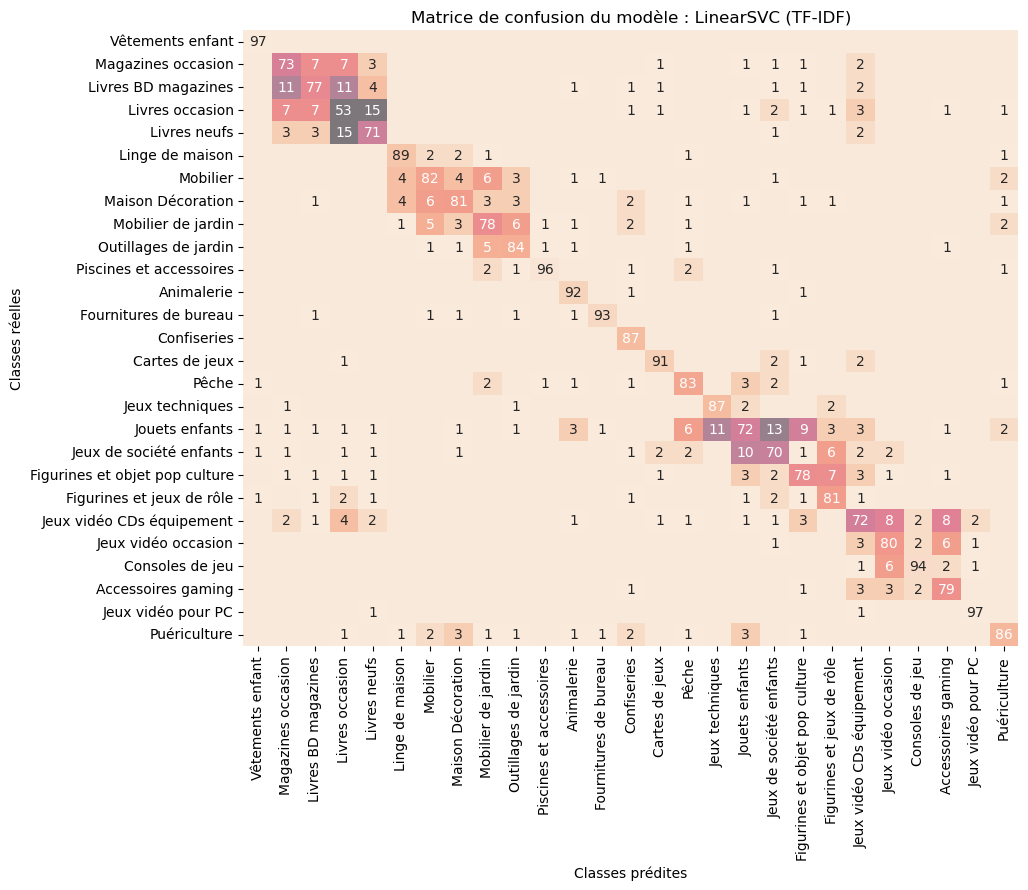

In [5]:
import src.utils.plot as uplot
import src.utils.results as results
reload(uplot)
reload(results)
res.plot_confusion_matrix('text/LinearSVC_tfidf', model_label='LinearSVC (TF-IDF)')